## Imports

In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.preprocessing as preprocessing 
import sklearn.metrics as metrics 
import sklearn.calibration as calibration 
import sklearn.linear_model as linear_model 
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes
import sklearn.model_selection as model_selection

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [28]:
## All preprocessing together (for reference)
# train_df.loc[train_df['Country']=='?', 'Country'] = train_df['Country'].mode()
# train_df.loc[train_df['occupation']=='?', 'occupation'] = 'NotDisclosed'
# train_df.loc[train_df['Working Section']=='?', 'Working Section'] = 'NotDisclosed'
# train_df.drop(axis="columns", labels='education', inplace=True)
# train_df.drop(axis="columns", labels='id', inplace=True)
# train_df['Financial Weight'] = np.log(train_df['Financial Weight'])
# train_df['age'] = np.log(train_df['age'])
# train_df.loc[train_df['Predictions'] == 'Rich', 'Predictions'] = 1
# train_df.loc[train_df['Predictions'] == 'Poor', 'Predictions'] = 0
# train_df['Predictions'] = train_df['Predictions'].astype(np.int64)

In [29]:
train_df.head()

,age,Working Section,Financial Weight,education,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,id,Predictions
0,48,Private,138970,Bachelors,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,6900,Rich
1,21,State Govenment,96483,Some-college,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,27355,Poor
2,49,Private,228583,HS-grad,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,12701,Poor
3,40,Private,130760,Assoc-voc,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,782,Rich
4,55,Local Government,223716,Some-college,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,20462,Poor


In [30]:
train_df.nunique()

age                       73
Working Section            9
Financial Weight       16634
education                 16
education-num             16
Marriage Status            7
occupation                15
Relationship Status        6
Skin Color                 5
Gender                     2
Capital Gain             118
Capital Loss              88
hours-per-week            91
Country                   42
id                     22792
Predictions                2
dtype: int64

In [31]:
train_df[train_df.duplicated()].shape

(0, 16)

In [32]:
(train_df == "?").sum()

age                       0
Working Section        1266
Financial Weight          0
education                 0
education-num             0
Marriage Status           0
occupation             1270
Relationship Status       0
Skin Color                0
Gender                    0
Capital Gain              0
Capital Loss              0
hours-per-week            0
Country                 413
id                        0
Predictions               0
dtype: int64

In [33]:
train_df.loc[train_df['Country']=='?', 'Country'] = train_df['Country'].mode()

In [34]:
train_df

,age,Working Section,Financial Weight,education,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,id,Predictions
0,48,Private,138970,Bachelors,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,6900,Rich
1,21,State Govenment,96483,Some-college,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,27355,Poor
2,49,Private,228583,HS-grad,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,12701,Poor
3,40,Private,130760,Assoc-voc,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,782,Rich
4,55,Local Government,223716,Some-college,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,20462,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,33,Self Employed No Inc,123424,Bachelors,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,40,United-States,958,Rich
22788,38,Private,218729,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,25,United-States,19469,Poor
22789,33,Self Employed No Inc,62932,HS-grad,9,Married Civilian,Craft-repair,Husband,White,Male,0,0,40,United-States,27174,Poor
22790,41,Private,155657,11th,7,No Marriage,Handlers-cleaners,Other-relative,Black,Female,0,0,40,United-States,15888,Poor


In [35]:
train_df['occupation'].value_counts()

Prof-specialty       2967
Craft-repair         2891
Exec-managerial      2799
Adm-clerical         2624
Sales                2607
Other-service        2272
Machine-op-inspct    1432
?                    1270
Transport-moving     1094
Handlers-cleaners     965
Farming-fishing       657
Tech-support          645
Protective-serv       456
Priv-house-serv       105
Armed-Forces            8
Name: occupation, dtype: int64

In [36]:
train_df.loc[train_df['occupation']=='?', 'occupation'] = 'NotDisclosed'
train_df.loc[train_df['Working Section']=='?', 'Working Section'] = 'NotDisclosed'

In [37]:
(train_df == "?").sum()

age                    0
Working Section        0
Financial Weight       0
education              0
education-num          0
Marriage Status        0
occupation             0
Relationship Status    0
Skin Color             0
Gender                 0
Capital Gain           0
Capital Loss           0
hours-per-week         0
Country                0
id                     0
Predictions            0
dtype: int64

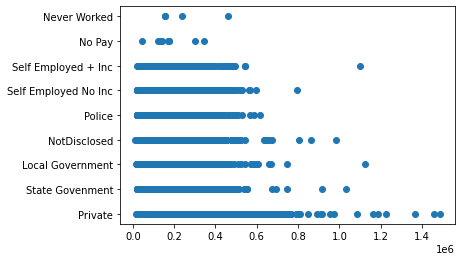

In [38]:
plt.scatter(train_df['Financial Weight'], train_df['Working Section'])

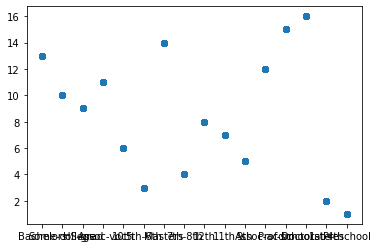

In [39]:
plt.scatter(train_df['education'], train_df['education-num'])

The column education is redundant

In [40]:
train_df.drop(axis="columns", labels='education', inplace=True)
train_df.drop(axis="columns", labels='id', inplace=True)

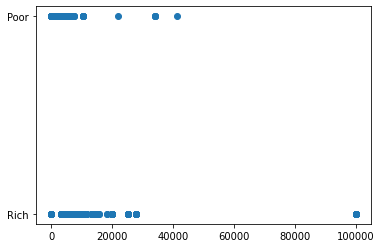

In [41]:
plt.scatter(train_df['Capital Gain'], train_df['Predictions'])

In [42]:
train_df.head()

,age,Working Section,Financial Weight,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,Predictions
0,48,Private,138970,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,Rich
1,21,State Govenment,96483,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,Poor
2,49,Private,228583,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,Poor
3,40,Private,130760,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,Rich
4,55,Local Government,223716,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,Poor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a062605d0>,
      dtype=object)

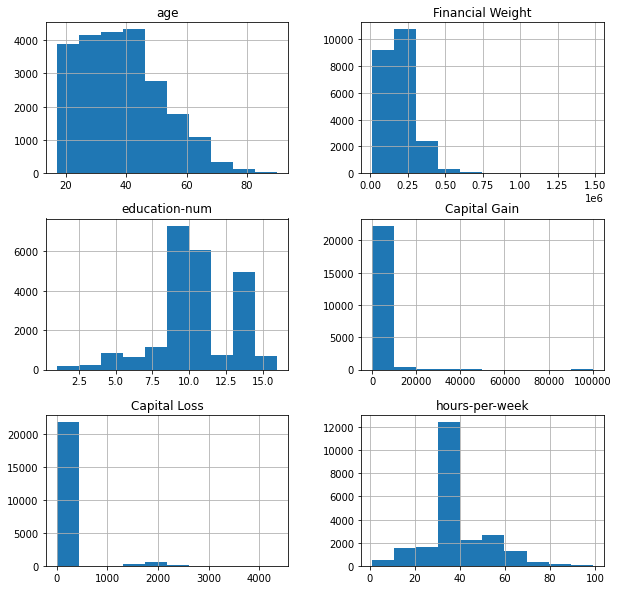

In [43]:
train_df.hist(figsize=(10,10))

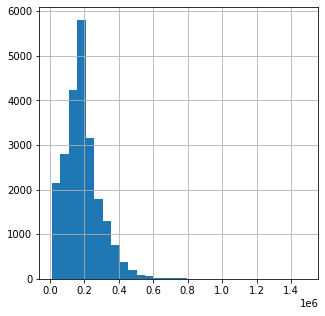

In [44]:
train_df['Financial Weight'].hist(bins = 30, figsize = (5,5))
plt.show()

Looks a bit skewed towards left

In [45]:
train_df['Financial Weight'] = np.log(train_df['Financial Weight'])

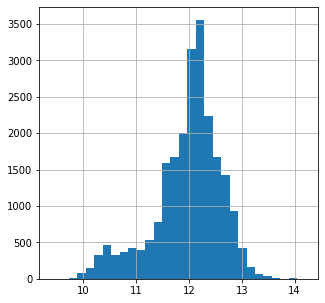

In [46]:
train_df['Financial Weight'].hist(bins = 30, figsize = (5,5))
plt.show()

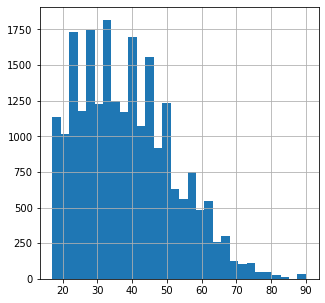

In [47]:
train_df['age'].hist(bins = 30, figsize = (5,5))
plt.show()

In [49]:
train_df['age'] = np.log(train_df['age'])

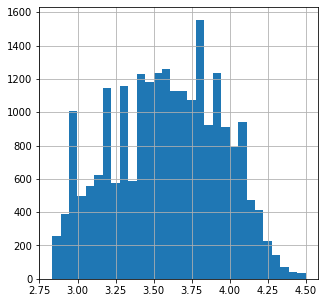

In [50]:
train_df['age'].hist(bins = 30, figsize = (5,5))
plt.show()

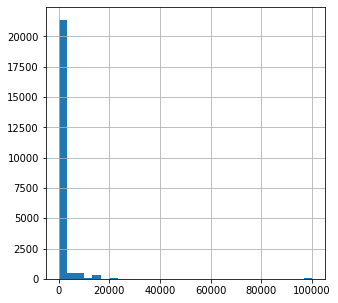

In [51]:
train_df['Capital Gain'].hist(bins = 30, figsize = (5,5))
plt.show()

These outliers are important, it is better to keep them.

In [52]:
train_df.head()

,age,Working Section,Financial Weight,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,Predictions
0,3.871201,Private,11.842013,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,Rich
1,3.044522,State Govenment,11.477122,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,Poor
2,3.891820,Private,12.339655,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,Poor
3,3.688879,Private,11.781119,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,Rich
4,4.007333,Local Government,12.318133,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,Poor


In [53]:
numeric_cols = ['age', 'Financial Weight', 'education-num', 'Capital Loss', 'Capital Gain', 'hours-per-week']

In [54]:
(train_df['Predictions'] == 'Rich').sum()/train_df['Predictions'].shape[0]

0.24083011583011582

Data is imbalanced.

In [55]:
train_df.loc[train_df['Predictions'] == 'Rich', 'Predictions'] = 1
train_df.loc[train_df['Predictions'] == 'Poor', 'Predictions'] = 0
train_df['Predictions'] = train_df['Predictions'].astype(np.int64)

In [56]:
train_df.head()

,age,Working Section,Financial Weight,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,Predictions
0,3.871201,Private,11.842013,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,3.044522,State Govenment,11.477122,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,0
2,3.891820,Private,12.339655,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,0
3,3.688879,Private,11.781119,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
4,4.007333,Local Government,12.318133,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,0


In [57]:
train_df.describe()

,age,Financial Weight,education-num,Capital Gain,Capital Loss,hours-per-week,Predictions
count,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000
mean,3.588960,11.983403,10.076737,1053.415716,86.643603,40.441032,0.240830
std,0.359364,0.632283,2.582573,7223.331352,402.098547,12.316680,0.427597
min,2.833213,9.416134,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.332205,11.676449,9.000000,0.000000,0.000000,40.000000,0.000000
50%,3.610918,12.092935,10.000000,0.000000,0.000000,40.000000,0.000000
75%,3.850148,12.378899,12.000000,0.000000,0.000000,45.000000,0.000000
max,4.499810,14.210727,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Without Polynomial Features

In [58]:
from sklearn.model_selection import train_test_split

In [119]:
def normalizeCols(X, cols):
    for c in cols:
        if(X[c].std() != 0):
           X[c] = (X[c]-X[c].mean())/X[c].std()
        
def dosplit(df, fcols, targetcol, nc):
    X = pd.get_dummies(df.loc[:, fcols], drop_first=True)
    y = df[targetcol]
    normalizeCols(X, nc)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30, random_state=3)
    return (X_train, X_test, y_train, y_test)

In [120]:
target = 'Predictions'
feat = list(train_df.columns)
feat.remove(target)


X_train, X_test, y_train, y_test = dosplit(train_df, feat, target, numeric_cols)

# Undersampling 
d1 = X_train[y_train == 1]
d2 = X_train[y_train == 0]

d2 = d2.iloc[0:int(len(d1)), :]

X_train = pd.concat([d1, d2])
y_train = pd.concat([pd.Series(np.ones(len(d1))), pd.Series(np.zeros(len(d2)))])

In [121]:
X_train.shape

(7698, 84)

## Stacking 

In [122]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier

In [123]:
m1 = KNeighborsClassifier(n_neighbors=50)
m2 = LinearSVC(C=100, dual=False)
m3 = GaussianNB()
m4 = LogisticRegression(class_weight={1:0.9, 0:1}, solver='lbfgs', max_iter=4000)

In [124]:
# meta model
mylr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [125]:
stackingclf = StackingClassifier(estimators=[('r1',m1), ('r2',m2), ('r3',m3), ('r4',m4)], final_estimator=mylr)

In [126]:
stackingclf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('r1',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=50, p=2,
                                                     weights='uniform')),
                               ('r2',
                                LinearSVC(C=100, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1,
                                          loss='squared_hinge', max_iter=1000,
                                          multi_class='ovr', penalty='l2',
                                       

In [127]:
from sklearn.metrics import roc_auc_score

In [128]:
yhat_test = stackingclf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, yhat_test)

0.9153446682119764

# Polynomial Features

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [148]:
# Function for adding polynomial features upto cube
def addPf(df, feat):
    i = 0
    while(i < len(feat)):
        j = i
        while(j < len(feat)):
            df[feat[i] + '*' + feat[j]] = df[feat[i]] * df[feat[j]]
            j+=1
        i+=1
        
    i = 0
    while(i < len(feat)):
        j = i
        while(j < len(feat)):
            k = j
            while(k < len(feat)):
                df[feat[i] + '*' + feat[j] + '*' + feat[k]] = df[feat[i]] * df[feat[j]] * df[feat[k]]
                k+=1
            j+=1
        i+=1
    

In [149]:
# split along with adding polynomial features
def dosplit2(df, fcols, targetcol, nc):
    X = pd.get_dummies(df.loc[:, fcols], drop_first=True)
    y = df[targetcol]
    normalizeCols(X, nc)
    addPf(X, nc)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30, random_state=3)
    return (X_train, X_test, y_train, y_test)

In [150]:
X_train, X_test, y_train, y_test = dosplit2(train_df, feat, target, numeric_cols)

d1 = X_train[y_train == 1]
d2 = X_train[y_train == 0]

d2 = d2.iloc[0:int(len(d1)), :]

X_train = pd.concat([d1, d2])
y_train = pd.concat([pd.Series(np.ones(len(d1))), pd.Series(np.zeros(len(d2)))])

In [151]:
X_train.shape

(7698, 161)

In [152]:
X_train.head()

,age,Financial Weight,education-num,Capital Gain,Capital Loss,hours-per-week,Working Section_Never Worked,Working Section_No Pay,Working Section_NotDisclosed,Working Section_Police,Working Section_Private,Working Section_Self Employed + Inc,Working Section_Self Employed No Inc,Working Section_State Govenment,Marriage Status_Married Civilian,Marriage Status_Married but Spouse Absent,Marriage Status_Married to Army Official,Marriage Status_No Marriage,Marriage Status_Separated,Marriage Status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_NotDisclosed,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Relationship Status_Not-in-family,Relationship Status_Other-relative,Relationship Status_Own-child,Relationship Status_Unmarried,Relationship Status_Wife,Skin Color_Asian-Pac-Islander,...,age*Capital Loss*Capital Gain,age*Capital Loss*hours-per-week,age*Capital Gain*Capital Gain,age*Capital Gain*hours-per-week,age*hours-per-week*hours-per-week,Financial Weight*Financial Weight*Financial Weight,Financial Weight*Financial Weight*education-num,Financial Weight*Financial Weight*Capital Loss,Financial Weight*Financial Weight*Capital Gain,Financial Weight*Financial Weight*hours-per-week,Financial Weight*education-num*education-num,Financial Weight*education-num*Capital Loss,Financial Weight*education-num*Capital Gain,Financial Weight*education-num*hours-per-week,Financial Weight*Capital Loss*Capital Loss,Financial Weight*Capital Loss*Capital Gain,Financial Weight*Capital Loss*hours-per-week,Financial Weight*Capital Gain*Capital Gain,Financial Weight*Capital Gain*hours-per-week,Financial Weight*hours-per-week*hours-per-week,education-num*education-num*education-num,education-num*education-num*Capital Loss,education-num*education-num*Capital Gain,education-num*education-num*hours-per-week,education-num*Capital Loss*Capital Loss,education-num*Capital Loss*Capital Gain,education-num*Capital Loss*hours-per-week,education-num*Capital Gain*Capital Gain,education-num*Capital Gain*hours-per-week,education-num*hours-per-week*hours-per-week,Capital Loss*Capital Loss*Capital Loss,Capital Loss*Capital Loss*Capital Gain,Capital Loss*Capital Loss*hours-per-week,Capital Loss*Capital Gain*Capital Gain,Capital Loss*Capital Gain*hours-per-week,Capital Loss*hours-per-week*hours-per-week,Capital Gain*Capital Gain*Capital Gain,Capital Gain*Capital Gain*hours-per-week,Capital Gain*hours-per-week*hours-per-week,hours-per-week*hours-per-week*hours-per-week
1386,1.671546,0.028096,1.906340,2.630031,-0.215479,1.182053,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.947291,-0.425755,11.562191,5.196563,2.335567,0.000022,0.001505,-0.000170,0.002076,0.000933,0.102106,-0.011541,0.140867,0.063312,0.001305,-0.015923,-0.007156,0.194344,0.087347,0.039258,6.927891,-0.783077,9.557879,4.295736,0.088513,-1.080352,-0.485558,13.186272,5.926497,2.663632,-0.010005,0.122115,0.054884,-1.490478,-0.669887,-0.301077,18.192087,8.176334,3.674808,1.651622
8045,-0.174196,-0.771485,1.906340,-0.145835,3.674115,-0.035808,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,...,0.093337,0.022918,-0.003705,-0.000910,-0.000223,-0.459180,1.134633,2.186794,-0.086800,-0.021312,-2.803679,-5.403568,0.214482,0.052663,-10.414372,0.413373,0.101498,-0.016408,-0.004029,-0.000989,6.927891,13.352219,-0.529984,-0.130130,25.733916,-1.021446,-0.250801,0.040544,0.009955,0.002444,49.597332,-1.968647,-0.483372,0.078141,0.019186,0.004711,-0.003102,-0.000762,-0.000187,-0.000046
2608,-0.257268,0.731565,2.293551,-0.145835,-0.215479,1.588006,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,-0.008084,0.088032,-0.005472,0.059580,-0.648768,0.391524,1.227479,-0.115321,-0.078049,0.849881,3.848306,-0.361547,-0.

In [153]:
lreg = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight={1:0.9, 0:1})
lreg.fit(X_train, y_train)
yhat_test = lreg.predict_proba(X_test)[:,1]

In [154]:
roc_auc_score(y_test, yhat_test)

0.9196593553805872

In [144]:
from sklearn.linear_model import RidgeClassifier
model_ridge = RidgeClassifier(alpha = 10)
model_ridge.fit(X_train, y_train)

RidgeClassifier(alpha=10, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [105]:
yhat_test = model_ridge.predict(X_test)

In [106]:
roc_auc_score(y_test, yhat_test)

0.8337247440385139

In [108]:
ch = np.linspace(0.2, 2, 100)

bsc = 0
bc = 0
for c in ch:
    lreg = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight={1:c, 0:1})
    lreg.fit(X_train, y_train)
    yhat_test = lreg.predict_proba(X_test)[:,1]
    sc = roc_auc_score(y_test, yhat_test)
    if(sc > bsc):
        bsc = sc
        bc = c

In [109]:
bsc

0.9197512059047102

In [110]:
bc

1.5636363636363635

### Stacking 

In [200]:
m1 = KNeighborsClassifier(n_neighbors=50)
m2 = LinearSVC(C=10, dual=False)
m3 = GaussianNB()
m4 = LogisticRegression(class_weight={1:0.9, 0:1}, solver='lbfgs', max_iter=4000)

mylr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [201]:
stackingclf = StackingClassifier(estimators=[ ('r1', m1), ('r2',m2), ('r3',m3), ('r4',m4)], final_estimator=mylr)
stackingclf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('r1',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=50, p=2,
                                                     weights='uniform')),
                               ('r2',
                                LinearSVC(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1,
                                          loss='squared_hinge', max_iter=1000,
                                          multi_class='ovr', penalty='l2',
                                        

In [202]:
yhat_test = stackingclf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, yhat_test)

0.921147908670314

### Final model 1

In [ ]:
X_tr = pd.get_dummies(train_df.loc[:, feat], drop_first=True)
X_tr.drop(axis = 'columns', labels = ['Country_Holand-Netherlands'], inplace = True)
y_tr = train_df[target]
normalizeCols(X_tr, numeric_cols)
addPf(X_tr, numeric_cols)

d1 = X_tr[y_tr == 1]
d2 = X_tr[y_tr == 0]

d2 = d2.iloc[0:int(len(d1)), :]

X_tr = pd.concat([d1, d2])
y_tr = pd.concat([pd.Series(np.ones(len(d1))), pd.Series(np.zeros(len(d2)))])


In [ ]:
X_tr.shape

(10978, 161)

In [ ]:
X_tr.head()

,age,Financial Weight,education-num,Capital Gain,Capital Loss,hours-per-week,Working Section_Local Government,Working Section_Never Worked,Working Section_No Pay,Working Section_Police,Working Section_Private,Working Section_Self Employed + Inc,Working Section_Self Employed No Inc,Working Section_State Govenment,Marriage Status_Married Civilian,Marriage Status_Married but Spouse Absent,Marriage Status_Married to Army Official,Marriage Status_No Marriage,Marriage Status_Separated,Marriage Status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Relationship Status_Not-in-family,Relationship Status_Other-relative,Relationship Status_Own-child,Relationship Status_Unmarried,Relationship Status_Wife,Skin Color_Asian-Pac-Islander,...,age*Capital Loss*Capital Gain,age*Capital Loss*hours-per-week,age*Capital Gain*Capital Gain,age*Capital Gain*hours-per-week,age*hours-per-week*hours-per-week,Financial Weight*Financial Weight*Financial Weight,Financial Weight*Financial Weight*education-num,Financial Weight*Financial Weight*Capital Loss,Financial Weight*Financial Weight*Capital Gain,Financial Weight*Financial Weight*hours-per-week,Financial Weight*education-num*education-num,Financial Weight*education-num*Capital Loss,Financial Weight*education-num*Capital Gain,Financial Weight*education-num*hours-per-week,Financial Weight*Capital Loss*Capital Loss,Financial Weight*Capital Loss*Capital Gain,Financial Weight*Capital Loss*hours-per-week,Financial Weight*Capital Gain*Capital Gain,Financial Weight*Capital Gain*hours-per-week,Financial Weight*hours-per-week*hours-per-week,education-num*education-num*education-num,education-num*education-num*Capital Loss,education-num*education-num*Capital Gain,education-num*education-num*hours-per-week,education-num*Capital Loss*Capital Loss,education-num*Capital Loss*Capital Gain,education-num*Capital Loss*hours-per-week,education-num*Capital Gain*Capital Gain,education-num*Capital Gain*hours-per-week,education-num*hours-per-week*hours-per-week,Capital Loss*Capital Loss*Capital Loss,Capital Loss*Capital Loss*Capital Gain,Capital Loss*Capital Loss*hours-per-week,Capital Loss*Capital Gain*Capital Gain,Capital Loss*Capital Gain*hours-per-week,Capital Loss*hours-per-week*hours-per-week,Capital Gain*Capital Gain*Capital Gain,Capital Gain*Capital Gain*hours-per-week,Capital Gain*hours-per-week*hours-per-week,hours-per-week*hours-per-week*hours-per-week
0,0.785388,-0.223618,1.131919,-0.145835,-0.215479,0.370146,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024680,-0.062641,0.016704,-0.042395,0.107604,-0.011182,0.056602,-0.010775,-0.007292,0.018509,-0.286508,0.054541,0.036913,-0.093690,-0.010383,-0.007027,0.017835,-0.004756,0.012071,-0.030637,1.450259,-0.276080,-0.186850,0.474245,0.052556,0.035570,-0.090280,0.024074,-0.061101,0.155082,-0.010005,-0.006771,0.017186,-0.004583,0.011632,-0.029522,-0.003102,0.007872,-0.019981,0.050713
3,0.278044,-0.319927,0.357497,-0.145835,-0.215479,0.776099,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.008737,-0.046498,0.005913,-0.031470,0.167474,-0.032746,0.036591,-0.022055,-0.014927,0.079436,-0.040888,0.024645,0.016680,-0.088765,-0.014855,-0.010053,0.053502,-0.006804,0.036210,-0.192702,0.045690,-0.027539,-0.018638,0.099189,0.016599,0.011234,-0.059785,0.007603,-0.040462,0.215331,-0.010005,-0.006771,0.036035,-0.004583,0.024388,-0.129789,-0.003102,0.016506,-0.087841,0.467468
7,0.954088,-1.723534,-0.416924,-0.145835,-0.215479,0.451337,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.029982,-0.092788,0.020291,-0.062799,0.194352,-5.119880,-1.238503,-0.640094,-0.433214,1.340727,-0.299595,-0.154839,-0.1

In [ ]:
lreg = LogisticRegression(solver='lbfgs', max_iter=4000, class_weight={1:0.9, 0:1})
lreg.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 0.9}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
sub_df = pd.DataFrame(test_df['id'])
# sub_df['Predictions'] = y_tes

In [ ]:
# All preprocessing
test_df.drop(axis="columns", labels='education', inplace=True)
test_df.drop(axis="columns", labels='id', inplace=True)
test_df['Financial Weight'] = np.log(test_df['Financial Weight'])
test_df['age'] = np.log(test_df['age'])

In [ ]:
X_tes = pd.get_dummies(test_df.loc[:, feat], drop_first=True)
normalizeCols(X_tes, numeric_cols)
addPf(X_tes, numeric_cols)

In [ ]:
# y_tes = lreg.predict(X_tes)
y_tes = lreg.predict_proba(X_tes)[:,1]

In [ ]:
X_tr.drop(axis = 'columns', labels = ['Country_Holand-Netherlands'], inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
lreg = LogisticRegression(solver='lbfgs', max_iter=4000, class_weight={1:3, 0:1})
lreg.fit(X_tr, y_tr)

LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=4000)

In [ ]:
X_tes = pd.get_dummies(test_df.loc[:, feat], drop_first=True)
normalizeCols(X_tes, X_tes.columns)
y_tes = lreg.predict(X_tes)

# for i in range(99):
#     if(X_tr.columns[i] != X_tes.columns[i]):
#         print(X_tr.columns[i])
#         break



In [ ]:
# sub_df = pd.DataFrame(test_df['id'])
sub_df['Predictions'] = y_tes

sub_df

,id,Predictions
0,13102,0.222483
1,19586,0.018717
2,29215,0.087232
3,23331,0.405576
4,31935,0.001041
...,...,...
9764,4937,0.002565
9765,9710,0.272241
9766,8835,0.086543
9767,31470,0.001078


In [ ]:
sub_df.to_csv("logreg_firstSub.csv", index=False)

In [ ]:
sub_df.shape

(9769, 2)

In [ ]:
(test_df == "?").sum()

age                      0
Working Section        570
Financial Weight         0
education                0
education-num            0
Marriage Status          0
occupation             573
Relationship Status      0
Skin Color               0
Gender                   0
Capital Gain             0
Capital Loss             0
hours-per-week           0
Country                170
id                       0
dtype: int64

In [ ]:
test_df.loc[(test_df['Working Section'] != '?') & (test_df['occupation'] == '?')]

,age,Working Section,Financial Weight,education,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,id
2935,18,Never Worked,206359,10th,6,No Marriage,?,Own-child,White,Male,0,0,40,United-States,5361
4585,23,Never Worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,10845
7489,30,Never Worked,176673,HS-grad,9,Married Civilian,?,Wife,Black,Female,0,0,40,United-States,32304


In [ ]:
train_df['Country'].value_counts()

United-States                 20382
Mexico                          465
?                               413
Philippines                     134
Germany                          92
Puerto-Rico                      88
Canada                           85
El-Salvador                      81
Cuba                             73
India                            66
Jamaica                          59
England                          59
Dominican-Republic               57
Vietnam                          51
China                            50
Columbia                         49
South                            48
Guatemala                        48
Poland                           48
Italy                            46
Japan                            42
Taiwan                           39
Iran                             30
Haiti                            29
Portugal                         29
Greece                           23
Peru                             21
Nicaragua                   

### Final Model 2

In [185]:
train_df = pd.read_csv("train.csv")

train_df.loc[train_df['Country']=='?', 'Country'] = train_df['Country'].mode()
train_df.loc[train_df['occupation']=='?', 'occupation'] = 'NotDisclosed'
train_df.loc[train_df['Working Section']=='?', 'Working Section'] = 'NotDisclosed'
train_df.drop(axis="columns", labels='education', inplace=True)
train_df.drop(axis="columns", labels='id', inplace=True)
train_df['Financial Weight'] = np.log(train_df['Financial Weight'])
train_df['age'] = np.log(train_df['age'])
train_df.loc[train_df['Predictions'] == 'Rich', 'Predictions'] = 1
train_df.loc[train_df['Predictions'] == 'Poor', 'Predictions'] = 0
train_df['Predictions'] = train_df['Predictions'].astype(np.int64)

train_df.head()

,age,Working Section,Financial Weight,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,Predictions
0,3.871201,Private,11.842013,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,3.044522,State Govenment,11.477122,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,0
2,3.891820,Private,12.339655,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,0
3,3.688879,Private,11.781119,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
4,4.007333,Local Government,12.318133,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,0


In [186]:
X_tr = pd.get_dummies(train_df.loc[:, feat], drop_first=True)
X_tr.drop(axis = 'columns', labels = ['Country_Holand-Netherlands'], inplace = True)
y_tr = train_df[target]
normalizeCols(X_tr, numeric_cols)
addPf(X_tr, numeric_cols)

# Under sampling
d1 = X_tr[y_tr == 1]
d2 = X_tr[y_tr == 0]

d2 = d2.iloc[0:int(len(d1)), :]

X_tr = pd.concat([d1, d2])
y_tr = pd.concat([pd.Series(np.ones(len(d1))), pd.Series(np.zeros(len(d2)))])

In [187]:
X_tr.shape

(10978, 160)

In [203]:
m1 = KNeighborsClassifier(n_neighbors=50)
m2 = LinearSVC(C=10, dual=False)
m3 = GaussianNB()
m4 = LogisticRegression(class_weight={1:0.9, 0:1}, solver='lbfgs', max_iter=4000)

mylr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [204]:
stackingclf = StackingClassifier(estimators=[ ('r1', m1), ('r2',m2), ('r3',m3), ('r4',m4)], final_estimator=mylr)
stackingclf.fit(X_tr, y_tr)

StackingClassifier(cv=None,
                   estimators=[('r1',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=50, p=2,
                                                     weights='uniform')),
                               ('r2',
                                LinearSVC(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1,
                                          loss='squared_hinge', max_iter=1000,
                                          multi_class='ovr', penalty='l2',
                                        

In [208]:
test_df = pd.read_csv("test.csv")

sub_df = pd.DataFrame(test_df['id'])

test_df.loc[test_df['Country']=='?', 'Country'] = test_df['Country'].mode()
test_df.loc[test_df['occupation']=='?', 'occupation'] = 'NotDisclosed'
test_df.loc[test_df['Working Section']=='?', 'Working Section'] = 'NotDisclosed'
test_df.drop(axis="columns", labels='education', inplace=True)
test_df.drop(axis="columns", labels='id', inplace=True)
test_df['Financial Weight'] = np.log(test_df['Financial Weight'])
test_df['age'] = np.log(test_df['age'])

In [210]:
X_tes = pd.get_dummies(test_df.loc[:, feat], drop_first=True)
normalizeCols(X_tes, numeric_cols)
addPf(X_tes, numeric_cols)

In [213]:
y_tes = stackingclf.predict_proba(X_tes)[:, 1]

In [214]:
sub_df['Predictions'] = y_tes
sub_df

,id,Predictions
0,13102,0.177958
1,19586,0.045149
2,29215,0.081633
3,23331,0.368038
4,31935,0.033807
...,...,...
9764,4937,0.036042
9765,9710,0.151545
9766,8835,0.068362
9767,31470,0.033774


In [215]:
sub_df.to_csv("logreg_stacking.csv", index=False)